## Introduction

Many chart types can be built with `matplotlib`: histograms, bars, polar, ... One can look at the __examples presented in the [documentation and gallery](https://matplotlib.org/stable/plot_types/index.html#plot-types).__.

Yet, a lot of code lines are needed to build only a simple graph. In some cases, the prefered way is this one:

1. Use higher-level packages __built on top of `matplotlib`__
2. Use `matplotlib` to customize the plot if needed



## Case study definition

A dataset about a pengouins population is downloaded  on [seaborn_data](https://github.com/mwaskom/seaborn-data) and stored on disk as 'data.csv'.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## `pandas`

`pandas` can perform quick plot of data stored in either a `DataFrame` or a `Series`. 



### Example 1: _line plot_

Let's plot the length of the bill of pengouns from Torgersen island, as a function of their mass:

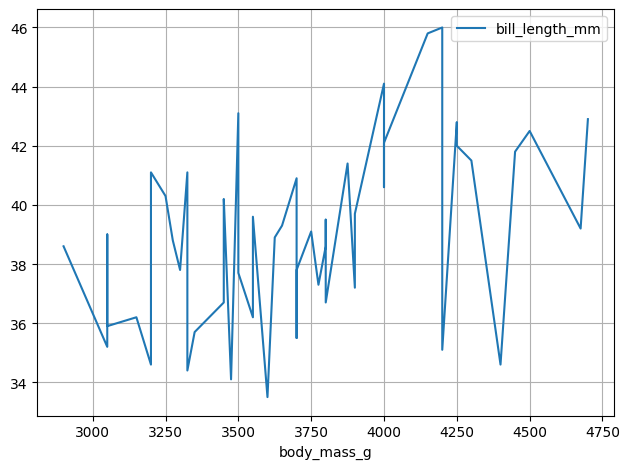

In [2]:
df1 = df[df['island']=='Torgersen']
df1 = df1.sort_values('body_mass_g')
ax = df1.plot(x='body_mass_g', y='bill_length_mm', kind='line')

The call to the `plot` method of `pandas` returned a `matplotlib` `axes` object: __let's modify it__.

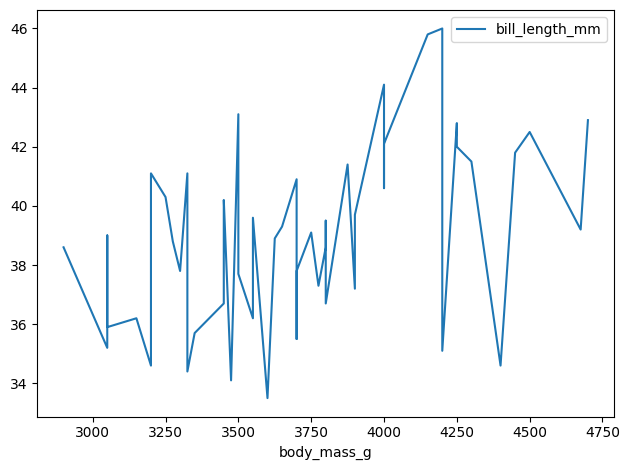

In [3]:
ax.grid()
ax.get_figure()   # needed to display once again
                  # the figure in Jupyter Notebook. 

Another way is to modify the plot when created. For this purpose, some _keywords arguments_ can be passed to the `plot` method of the dataframe. These are the same than the plot function of `matplotlib`.

<Axes: xlabel='body_mass_g'>

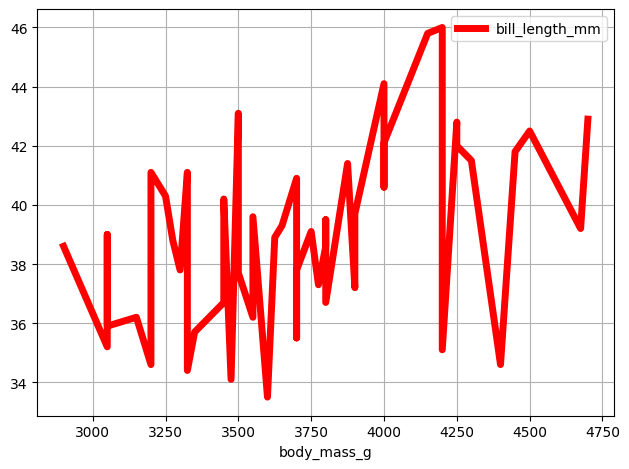

In [4]:
df1.plot(x='body_mass_g', y='bill_length_mm', kind='line', 
        color='red', linewidth=5)    # these arguments are passed to matplotlib


### Example 2: _barplot_

Let's plot the numbers of females and males on Torgersen island:

In [5]:
df2 = df.groupby('sex')['bill_length_mm'].count()  # a random column is needed 
                                                   # for rows to be counted
df2

sex
Female    165
Male      168
Name: bill_length_mm, dtype: int64

<Axes: xlabel='sex'>

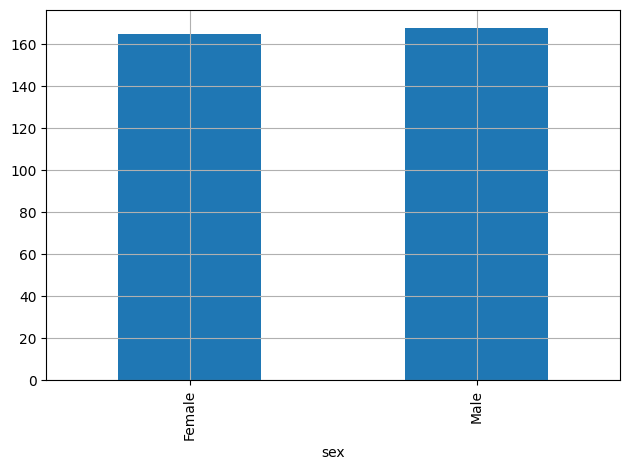

In [6]:
df2.plot(kind='bar')

### Conclusion

The `plot` method is an easy way to quickly inspect the content of a DataFrame. Yet, it is unadapted to advanced statistical plots


In that case, the preferred tool is `seaborn`, which produces clear an pretty charts.

## `seaborn`

`seaborn` is a plotting library that is built on top of `matplotlib`. 

__The strength of `seaborn` is that it can directly be used with `pandas` DataFrames and Series__.


Learning `seaborn` mainly consists in understanding the arguments it takes:

- `x`: abscissa data
- `y`: ordinate data
- `hue`: data differenciated according to a __color__ code
- `style`: data differenciated according to the line/marker __style__
- `size`: data differenciated according to the line/marker __size__



`seaborn` comes with 2 kinds of funtions:

1. Functions that create only one ax to plot the data
2. Functions that create several axes using arguments `row` and `col` (related to a `FacetGrid` ojects):

    - `row`: data differenciated according to the __row__ of the ax object in the figure
    - `col`: data differenciated according to the __col__ of the ax object in the figure



### One `axes`

Let's go back to our pengouins. The bill length is plotted as a function of body mass, with a color code and style differenciation for species. The returned object is an ax object: it can be customized if needed.

<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

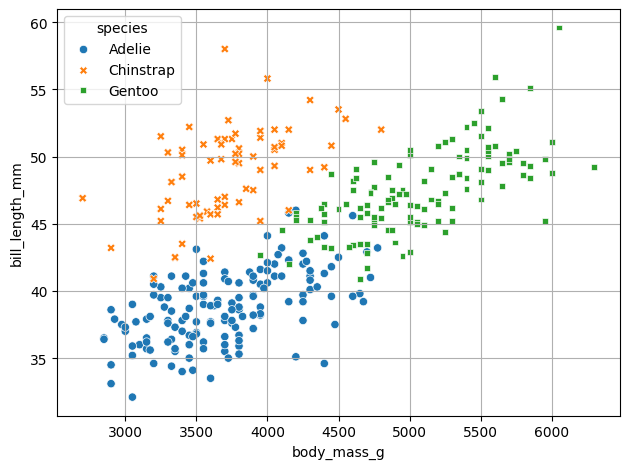

In [7]:
import seaborn as sns
sns.scatterplot(df, x='body_mass_g', y='bill_length_mm', hue='species', style='species')

### Several `axes`

#### Complete example

Here after, the bill length is plotted:

 - as a function of body mass
 - with a color code for species
 - with sex differenciation along rows
 - with island differenciation along columns
 

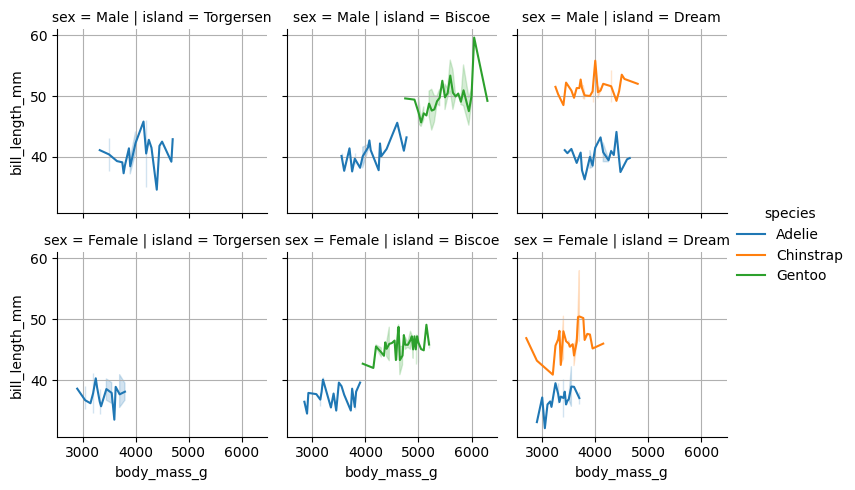

In [8]:
import seaborn as sns
import matplotlib
fg = sns.relplot(df, kind='line', x='body_mass_g', y='bill_length_mm', hue='species', row='sex', col='island', 
                 height=2.5, aspect=1)


Notes:

- `relplot` needs `kind='line'` to behave as `lineplot`
- `height` is the height of each _subplot_, i.e. each ax.

  `aspect` is the width/height ratio.
- Light color zones represent uncertainties. Indeed, given a tuple of (species, sex, island, mass), there are several individuals. 



  Let's investigate the uncertainties zones:

In [9]:
df_ = df.groupby(['body_mass_g', 'species', 'sex', 'island']).count()
df_[(df_['bill_depth_mm']!=1)|(df_['flipper_length_mm']!=1)].head(3)

,,,,bill_length_mm,bill_depth_mm,flipper_length_mm
body_mass_g,species,sex,island,,,
2850.0,Adelie,Female,Biscoe,2,2,2
3000.0,Adelie,Female,Dream,2,2,2
3050.0,Adelie,Female,Torgersen,3,3,3



Finally, note that `relplot` returned a `FacetGrid` instance. It has an `axes` attribute (numpy array) that can be used to customize plots.

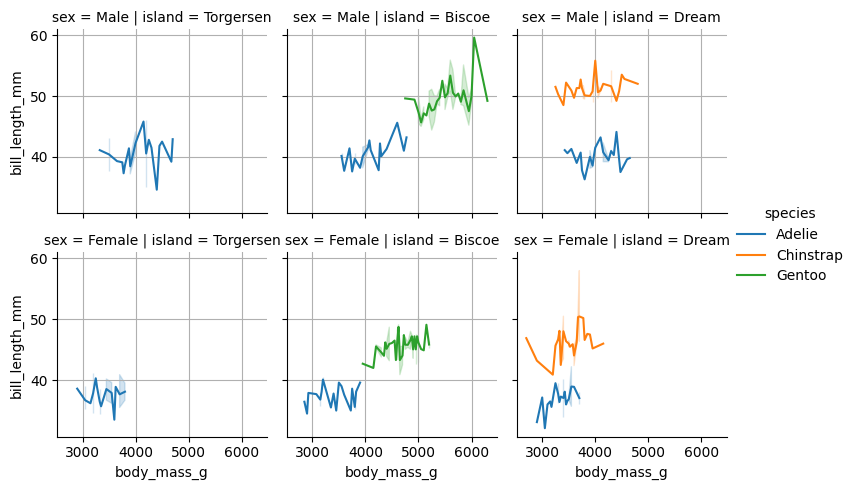

In [9]:
axes = fg.axes
axes[1, 2].grid()
axes[1, 2].get_figure()  # needed for Jupyter

#### Other chart types

Many charts types can be created using `seaborn` (see the [gallery](https://seaborn.pydata.org/examples/index.html)).

For instance, let's create a `violinplot` to get a statistcial approach of data:

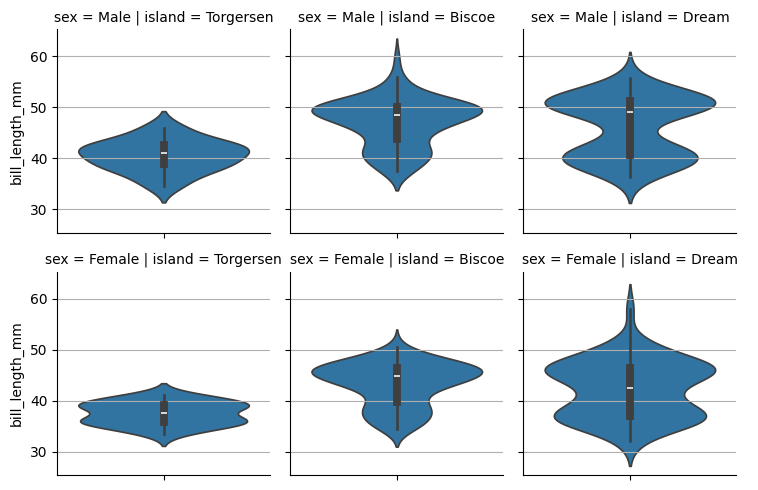

In [10]:
fg = sns.catplot(df, kind='violin', y='bill_length_mm',  row='sex', col='island',
                height=2.5)